In [1]:
%conda install scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%conda install random

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - random

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
from scipy import stats # istatistik kütüphanesi
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn-bright")

import warnings
warnings.filterwarnings("ignore")

In [6]:
yas = [1,2,3,5,6,7,7,10,12,13]
#ortlama
ortalama_yas = np.mean(yas)
print("ortalama :", ortalama_yas)

#ortanca ya da medyan
medyan_yas = np.median(yas)
print("medyan yas :", medyan_yas)

# mod
mod_yas = stats.mode(yas)
print("mod yas :",mod_yas)

ortalama : 6.6
medyan yas : 6.5
mod yas : ModeResult(mode=array([7]), count=array([2]))


In [7]:
maas = [1,4,3,2,5,4,2,3,1,500]
print("ortalama maas :", np.mean(maas))

ortalama maas : 52.5


In [9]:
#medyan
print("maas ortanca :",np.median(maas))

maas ortanca : 3.0


In [10]:
yas = [1,2,3,5,6,7,7,10,12,13]
print("değer aralığı : ", (np.max(yas)- np.min(yas)))

değer aralığı :  12


In [12]:
print("varyans :", np.var(yas))
var = sum((yas-np.mean(yas))**2 / len(yas))
print("formül ile hesaplanana varyans:", var)

varyans : 15.040000000000001
formül ile hesaplanana varyans: 15.04


In [14]:
print("standart_sapma :", np.std(yas))
std = np.sqrt(sum((yas-np.mean(yas))**2 /len(yas)))
print("kendi hesapladığımız standart sapma :", std)

standart_sapma : 3.8781438859330635
kendi hesapladığımız standart sapma : 3.878143885933063


X1 ortalama:15.201931624430047, medya: 15.221017827263294 ve standart sapma: 2.8742581204487023
X2 ortalama: 14.440478360022, medyan :12.304575487530965 ve standartsapma: 8.591192290982168


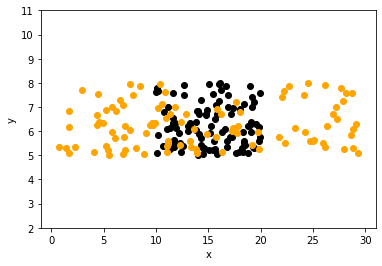

In [16]:
# ortalamaları ve medyanları aynı olan ancak standart sapmaları farklı olan veriler
y = np.random.uniform(5,8,100)  # 5 ile 8  arasında düzgün dağılıma uygun 100 adet sayı değeri oluşturacak
x1 = np.random.uniform(10,20,100)
x2 = np.random.uniform(0,30,100)
plt.scatter(x1,y,color="black")
plt.scatter(x2,y,color ="orange")
plt.xlim([-1,31])#yatay eksen limitim
plt.ylim([2,11])# dikey eksen limitim
plt.xlabel("x")
plt.ylabel("y")

print("X1 ortalama:{}, medya: {} ve standart sapma: {}".format(np.mean(x1), np.median(x1), np.std(x1)))
print("X2 ortalama: {}, medyan :{} ve standartsapma: {}".format(np.mean(x2), np.median(x2), np.std(x2)))

In [19]:
veri = pd.read_csv("istatistik.csv")
veri.head()

,alan,yari_cap,fraktal_boyutlar,teshis
0,1006.936140,18.006777,0.006237,kotu_huylu
1,1326.152435,21.327700,0.003618,kotu_huylu
2,1208.172921,20.668194,0.004664,kotu_huylu
3,388.090648,11.543309,0.009244,kotu_huylu
4,1303.794335,21.167030,0.005192,kotu_huylu


In [21]:
# iyi huylu olanlara ilişkin verileri alalım
veri_iyi = veri[veri["teshis"] == "iyi_huylu"]

#decribe yöntemini kullanalım
desc = veri_iyi.yari_cap.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
# aykırı değerleri bulalım
alt_sinir = Q1 - (1.5*IQR)
ust_sinir= Q3 + (1.5*IQR)
print("Alt Sınır :{} ve üst Sınır: {} aralığının dışındakiler aykırı değerlerdir".format(alt_sinir, ust_sinir))
print("iyi huylu hücreler için aykırı değerler: ", veri_iyi[(veri_iyi.yari_cap < alt_sinir) | (veri_iyi.yari_cap > ust_sinir)].yari_cap.values)



Alt Sınır :8.083323460194386 ve üst Sınır: 17.510397078942404 aralığının dışındakiler aykırı değerlerdir
iyi huylu hücreler için aykırı değerler:  [ 7.29511458 18.78180383]


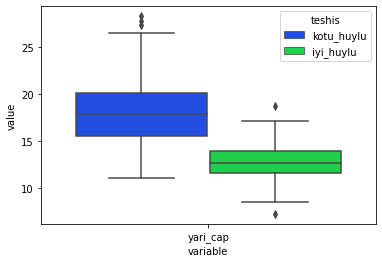

In [22]:
veri_kotu = veri[veri["teshis"] == "kotu_huylu"]

melted_veri = pd.melt(veri, id_vars = "teshis", value_vars = ['yari_cap'])
sns.boxplot(x= "variable", y="value", hue = "teshis", data = melted_veri) # kutu grafiği
plt.show()

## iki değişkenli veri ve korelsyon

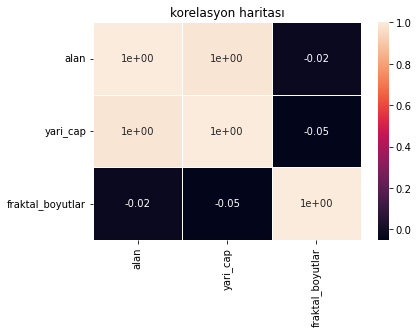

In [23]:
sns.heatmap(veri.corr(), annot =True, linewidths=0.5, fmt='.1')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('korelasyon haritası')
plt.show()

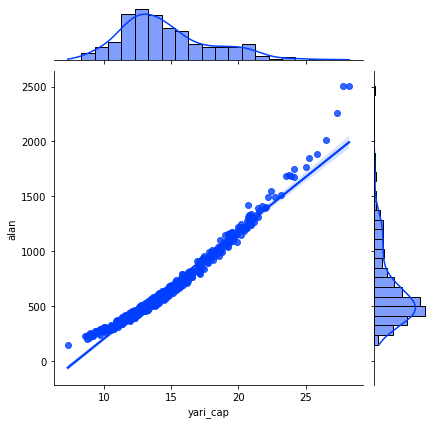

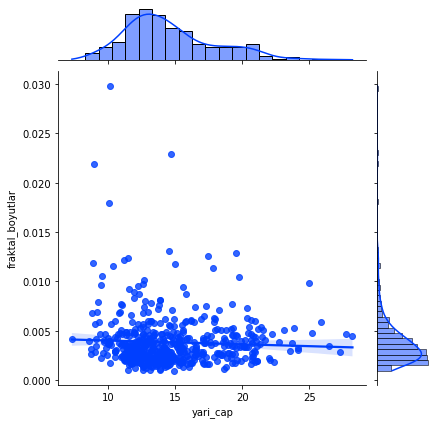

In [24]:
#ortaklık grafiği ile görselleştirelim
sns.jointplot(veri.yari_cap, veri.alan, kind="reg")
sns.jointplot(veri.yari_cap, veri.fraktal_boyutlar, kind ="reg")
plt.show()


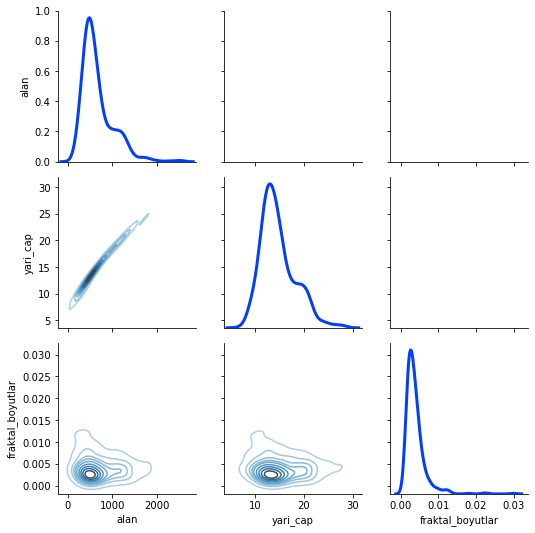

In [25]:
# 3 değişkeinn birbiri arasındaki ilişkiyi görselleştireim
g = sns.PairGrid(veri, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap ="Blues_d")
g.map_diag(sns.kdeplot, lw=3)
plt.show()

Yarıçap ve alan arasındaki kovaryansı: 1215.9475736117886
Yarı çap ve fraktal boyutlar arasındaki kovaryans: -0.00047110365714838004


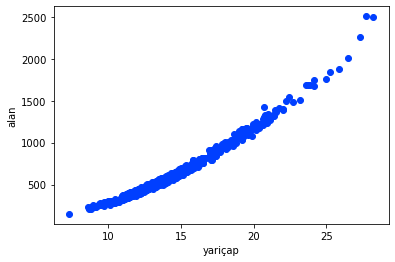

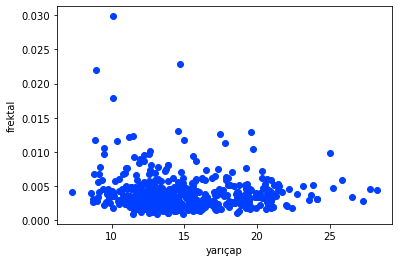

In [27]:
# yariçap ile alan arasındaki kovaryans
print("Yarıçap ve alan arasındaki kovaryansı:", veri.yari_cap.cov(veri.alan))
print("Yarı çap ve fraktal boyutlar arasındaki kovaryans:", veri.yari_cap.cov(veri.fraktal_boyutlar))
plt.figure()
plt.scatter(veri.yari_cap, veri.alan)
plt.xlabel("yariçap")
plt.ylabel("alan")
plt.figure()
plt.scatter(veri.yari_cap, veri.fraktal_boyutlar)
plt.xlabel("yarıçap")
plt.ylabel("frektal")
plt.show()

## pearson korelasyon katsayısı

In [31]:
p1 = veri.loc[:,["alan", "yari_cap"]].corr(method ="pearson")
p2 = veri.yari_cap.cov(veri.alan) / (veri.yari_cap.std() * veri.alan.std()) #formülle
print("Pearson korelasyon katsayisi:")
print(p1)
print("Pearson korelasyon katsayisi:", p2)

Pearson korelasyon katsayisi:
              alan  yari_cap
alan      1.000000  0.983313
yari_cap  0.983313  1.000000
Pearson korelasyon katsayisi: 0.9833132056513869


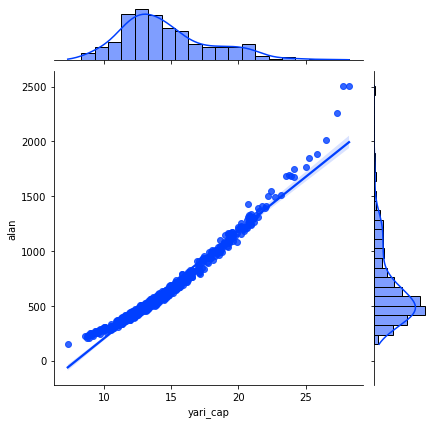

In [32]:
# görselleştirelim
sns.jointplot(veri.yari_cap, veri.alan, kind ="reg")
plt.show()

In [33]:
# -1 ile 1 ise korelasyon vardır ama 0 ise korelasyon yoktur

## sperman rank katsayısı

In [34]:
# değişkenler arasındaki ilişki doğrusalsa ve değişkenler kabaca normalse Pearson korelasyonu iyi çalışır. ancak aykırı değerler varsa problem olabilir.
# Spearman korelasyonunu hesaplamak için her bir değerin sırasını hesaplamamız gerekir


In [36]:
veri_rank = veri.rank()
spearman_corr = veri_rank.loc[:,["alan", "yari_cap"]].corr(method="spearman")
print("spearman korelasyonu:")
print(spearman_corr)

spearman korelasyonu:
              alan  yari_cap
alan      1.000000  0.993754
yari_cap  0.993754  1.000000


In [37]:
# Spearman korelasyonu(0.99), Pearson korelasyonu(0.98) biraz yüksek çıkıyor
# dağılımlar arasındaki ilişki doğrusal değilse, spearman korelasyonu ilişkinin gücünü daha iyi tahmin etme eğilimindedie.
# pearson korelasyonu aykırı değerlerden etkilenebilir. spearman korelasyonu daha sağlamdır.

In [38]:
#rank ı anlayalım
sozluk = {'isim' : ['ali', 'veli', 'hakan', 'ayse', 'fatma'],
          'rapor': [4, 24, 31, 2, 3]}
veri1 = pd.DataFrame(sozluk, index=['ankara', 'istnbul', 'sinop','bolu', 'izmir'])
veri1

,isim,rapor
ankara,ali,4
istnbul,veli,24
sinop,hakan,31
bolu,ayse,2
izmir,fatma,3


In [40]:
veri1['raporRanked'] = veri1['rapor'].rank(ascending=1) # ascending artan demek
veri1 

,isim,rapor,raporRanked
ankara,ali,4,3.0
istnbul,veli,24,4.0
sinop,hakan,31,5.0
bolu,ayse,2,1.0
izmir,fatma,3,2.0


In [48]:
# veriyi iki grua ayıralım
veri_iyi = veri[veri["teshis"] == "iyi_huylu"]
veri_kotu = veri[veri["teshis"] =="kotu_huylu"]


# m1:  kötü huylu hücrelerim yarıçap ortalaması
# m2: iyi huylu hücrelerin yarcap ortalaması
pay= veri_kotu.yari_cap.mean() - veri_iyi.yari_cap.mean()

# s1^2: kötü huylu hücrelerin yarıcap varyansı
#s2^2: iyi huylu hücrelerin yarıcap varyansı
iyi_varyans = veri_iyi.yari_cap.var()
kotu_varyans = veri_kotu.yari_cap.var()

# n1 : kötü huylu hücrelerin veri sayısı
#n2 : iyi huylu hüverelerin veri sayısı
n1 = len(veri_kotu)
n2 = len(veri_iyi)

payda = np.sqrt(((n2* kotu_varyans) + (n1*iyi_varyans)) / float(n1 * n2))

effect_size = pay / payda
print("Etki Büyüklüğü :", effect_size)


Etki Büyüklüğü : 21.242539279949423


In [49]:
%conda install math

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - math

Current channels:

  - https://conda.anaconda.org/conda-forge/linux-64
  - https://conda.anaconda.org/conda-forge/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [ ]:
# örnek Permutasyon
# bir web sitesine üye olacaksınız; 5 karakterli bir şifre belirleyeceksiniz.
# karakterler küçük harf ya da rakamlar(0-9 arası sayılar) olabilir.
# kullanılan bir karakter ya da rakamı tekrar kullanmak yok
# kaç farklı şifre yaratabiliriz?
# n = 29(harf Sayısı) + 10( rakam sayısı) =39
# r = 5
# P = 39! / ( 39 - 5)! = 39! / 34!

In [2]:

import math
pay = math.factorial(39)

payda = math.factorial(34)
P = int(pay / payda)
print(P)

69090840


In [51]:
# eğer kullanılan karakterlerin tekrar kullanılmasına izin verilseydi.
# P = n^r

In [52]:
39**5

90224199

In [53]:
#örnek
# 3 farklı pantolon, 4 farklı ceket ve 2 farklı gömleği olan kişi bir ceket bir gömlek ve bir pantolonu kaç farklı şekilde giyebilir.
# P= 3*4*2 =24

örnek Uzay :  [1 2 3 4 5 6]


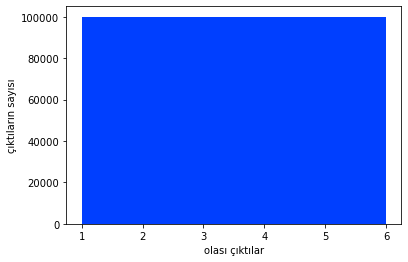

In [54]:
# zar örneği
a = np.random.randint(1,7,600000)
print("örnek Uzay : ",np.unique(a))
plt.hist(a, bins=6)
plt.ylabel("çıktıların sayısı")
plt.xlabel("olası çıktılar")
plt.show()

In [55]:
# binom daılımı
""" 
binom dağılımı 2 tane kesikli sonucu (örneğin Başarılı/Başarısız, Doğru/Yanlış, 1/0) olan bir denemenin snucuna ilişkin dağılımıdır
engüzel örneği yazı tura atmaktır
Bernoulli Denemesi:
  Başarı ya da Başarısız diye 2 tane sonucu olan rastgele deneylerdir.
  n = deneme sayısı( tamsayı)
  p = başarı olasılıığı ( 1 ya da 0)
  r = başarılı deneme sayısı (tamsayı)
  denemeler birbirinden bağımsızdır.
  """

' \nbinom dağılımı 2 tane kesikli sonucu (örneğin Başarılı/Başarısız, Doğru/Yanlış, 1/0) olan bir denemenin snucuna ilişkin dağılımıdır\nengüzel örneği yazı tura atmaktır\nBernoulli Denemesi:\n  Başarı ya da Başarısız diye 2 tane sonucu olan rastgele deneylerdir.\n  n = deneme sayısı( tamsayı)\n  p = başarı olasılıığı ( 1 ya da 0)\n  r = başarılı deneme sayısı (tamsayı)\n  denemeler birbirinden bağımsızdır.\n  '

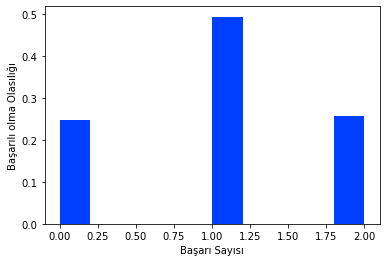

In [56]:
n = 2 # toplam deneme sayısı
p = 0.5 #her bir denemede başarılı olma olasılığı
s = np.random.binomial(n, p, 10000) # 10000 test sayısı
agirlik = np.ones_like(s) / float(len(s))
plt.hist(s, weights = agirlik)
plt.xlabel("Başarı Sayısı")
plt.ylabel("Başarılı olma Olasılığı")
plt.show()

In [3]:
# bir zar 10 defa atılıyor . 4 kere 6 sayısı gelme olasılığı nedir?
n = 10
r = 4 # başarı ölçütü
p = 1/6 # başarı oranı

# scipy kütüphanesi kul
from scipy.stats import binom
print(binom.pmf(r,n,p))


# binom açılım formülüne göre sonuç
import math
print((math.factorial(n)/(math.factorial(n-r)*math.factorial(r)))*(p**r)*(1-p)**(n-r))
      
    

0.054265875850988195
0.05426587585098817


Text(0, 0.5, 'Olasılık')

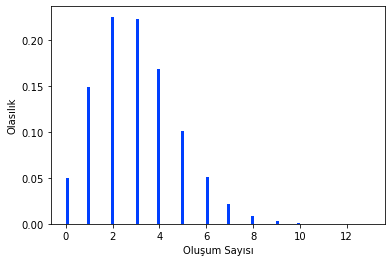

In [61]:
# poisson dağılımı
# örneğin her saatte ortalama 3 kamyon görselleştirmesi
lambda1 = 3
s1 = np.random.poisson(lambda1, 100000)
agirlik = np.ones_like(s1) / float(len(s1))
plt.hist(s1, weights = agirlik, bins= 100)
plt.xlabel("Oluşum Sayısı")
plt.ylabel("Olasılık")



şekilde görüldüğü gibi en yüksek olasılık saatte 2-3 kamyon ama saatte 8 kamyon bile olabilir.

Ortalma:  110.15341695691785
Standart Sapma :  19.928630893203483


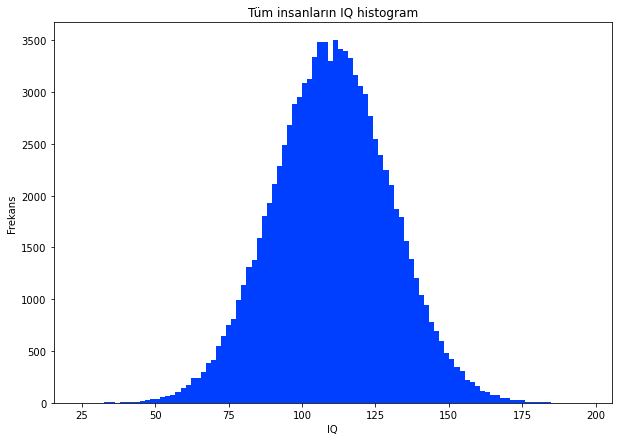

In [62]:
mu = 110
sigma = 20
s = np.random.normal(mu, sigma, 100000)
print("Ortalma: ", np.mean(s))
print("Standart Sapma : ",np.std(s))
plt.figure(figsize= (10,7))
plt.hist(s,100)
plt.ylabel("Frekans")
plt.xlabel("IQ")
plt.title("Tüm insanların IQ histogram")
plt.show()

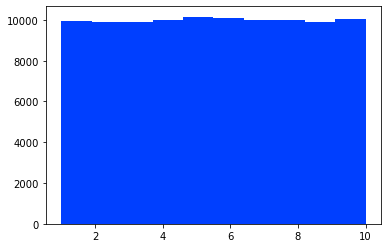

In [9]:
# 0 ile 10 arasında 100000 adet tamsayı oluşturalım
x = np.random.random_integers(10, size = 100000)
plt.hist(x)
plt.show()

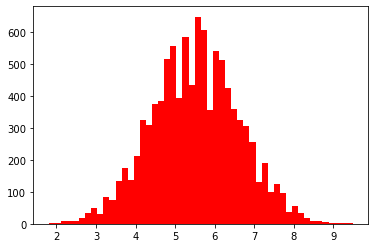

In [10]:

# alınan örnekler yaklaşık olarak normal dağılım gösteriri
ortalama_ornek = []
for i in range(10000):
    ornek = random.randrange(5,10)
    ortalama_ornek.append(np.mean(random.sample(list(x), ornek)))
plt.hist(ortalama_ornek, bins = 50, color ="red")
plt.show()

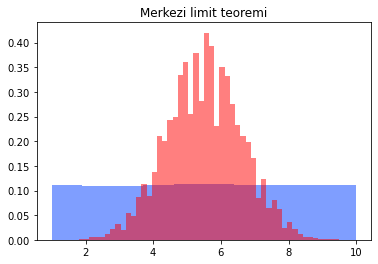

In [11]:
plt.hist(x,alpha= 0.5, density =True)
plt.hist(ortalama_ornek, bins =50, alpha=0.5, color="red", density=True)
plt.title("Merkezi limit teoremi")
plt.show()

ortalama 1:  14.879005879375
standart sapma1:  0.4106367159180011
varyans1 :  0.16862251245992116
ortalama 2:  15.17467023375
standart sapma 2:  0.29561498265957253
varyans 2 :  0.08738821797281937


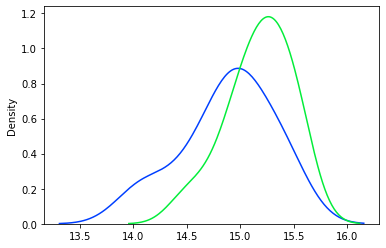

In [12]:
s1= np.array([14.67230258, 14.5984991 , 14.99997003, 14.83541808, 15.42533116,
       15.42023888, 15.0614731 , 14.43906856, 15.40888636, 14.87811941,
       14.93932134, 15.04271942, 14.96311939, 14.0379782 , 14.10980817,
       15.23184029])
print("ortalama 1: ", np.mean(s1))
print("standart sapma1: ", np.std(s1))
print("varyans1 : ", np.var(s1))

s2 = np.array([15.23658167, 15.30058977, 15.49836851, 15.03712277, 14.72393502,
       14.97462198, 15.0381114 , 15.18667258, 15.5914418 , 15.44854406,
       15.54645152, 14.89288726, 15.36069141, 15.18758271, 14.48270754,
       15.28841374])

print("ortalama 2: ", np.mean(s2))
print("standart sapma 2: ", np.std(s2))
print("varyans 2 : ", np.var(s2))

# görselleştirelim
sns.kdeplot(s1)
sns.kdeplot(s2)
plt.show()

In [15]:
t_val = np.abs(np.mean(s1)-np.mean(s2))/np.sqrt((np.var(s1)/len(s1))+(np.var(s2)/len(s2)))
print("t-değeri: ", t_val)

t-değeri:  2.3373829708002227
